In [1]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (
    RBF,
    Matern,
    RationalQuadratic,
    Exponentiation,
)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Coeff_D

In [127]:
# Load the data from CSV file
data = pd.read_csv(
    r"D:\New_Python\Me793\coeffd\scaled_train_data.csv",
    encoding="cp1252",
)
data.fillna(0, inplace=True)

target = "Coeff_D"

Y = data[target]
X = data.drop([target, "Name"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Create a Gaussian Process Regression model with an RBF kernel
model = GaussianProcessRegressor(
    optimizer="fmin_l_bfgs_b",
    random_state=50,
    kernel=1.0 + 1.0 * Exponentiation(Matern(length_scale=1.0, nu=1.5), exponent=2),
    alpha=0.01,
    n_restarts_optimizer=1,
)

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the training data
y_pred_train = model.predict(X_train)

# Calculate R2 score
r2 = r2_score(Y_train, y_pred_train)
print("R2 Score Train:", r2)

# Calculate root mean square error (RMSE)
mse = mean_squared_error(Y_train, y_pred_train)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE) Train:", rmse)

R2 Score Train: 0.9974322470159375
Root Mean Square Error (RMSE) Train: 0.05105457516919628


R2 Score Test: 0.936598695889114
Root Mean Square Error (RMSE) Test: 0.24118738747344187


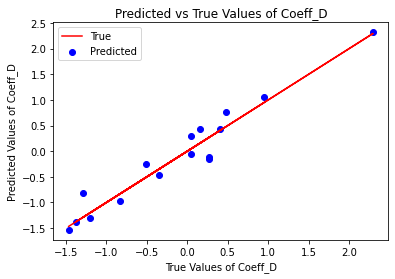

In [128]:
import matplotlib.pyplot as plt

y_pred_test = model.predict(X_test)
r2_test = r2_score(Y_test, y_pred_test)
print("R2 Score Test:", r2_test)

mse_test = mean_squared_error(Y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Square Error (RMSE) Test:", rmse_test)

# Plotting predicted vs true values
plt.scatter(Y_test, y_pred_test, color="blue", label="Predicted")
plt.plot(Y_test, Y_test, color="red", label="True")
plt.xlabel("True Values of Coeff_D")
plt.ylabel("Predicted Values of Coeff_D")
plt.title("Predicted vs True Values of Coeff_D")
plt.legend()
plt.show()

# Ridge Regressor

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Define the Ridge regression model
ridge = Ridge()

# Define a grid of hyperparameters to search (alphas)
alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]  # Adjust the range as needed

# Create a parameter grid
param_grid = {'alpha': alphas}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

# Get the best alpha and the corresponding model
best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_


# Make predictions on the training data
y_pred_train = best_model.predict(X_train)
print("Best Alpha:", best_alpha)
# Calculate R2 score
r2 = r2_score(Y_train, y_pred_train)
print("R2 Score Train:", r2)

# Calculate root mean square error (RMSE)
mse = mean_squared_error(Y_train, y_pred_train)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE) Train:", rmse)





Best Alpha: 1.0
R2 Score Train: 0.9785224735357332
Root Mean Square Error (RMSE) Train: 0.14765568640646687


R2 Score Test: 0.8815379313129517
Root Mean Square Error (RMSE) Test: 0.3296819376161099


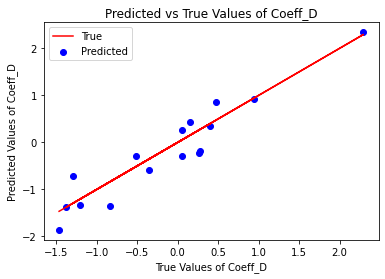

In [9]:
import matplotlib.pyplot as plt

y_pred_test = best_model.predict(X_test)
r2_test = r2_score(Y_test, y_pred_test)
print("R2 Score Test:", r2_test)

mse_test = mean_squared_error(Y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Square Error (RMSE) Test:", rmse_test)

# Plotting predicted vs true values
plt.scatter(Y_test, y_pred_test, color="blue", label="Predicted")
plt.plot(Y_test, Y_test, color="red", label="True")
plt.xlabel("True Values of Coeff_D")
plt.ylabel("Predicted Values of Coeff_D")
plt.title("Predicted vs True Values of Coeff_D")
plt.legend()
plt.show()


# Random forest regressor

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create and fit Random Forest Regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators) and other hyperparameters
random_forest_model.fit(X_train, Y_train)

# Make predictions on the training data
y_pred_train = random_forest_model.predict(X_train)

# Calculate R2 score
r2 = r2_score(Y_train, y_pred_train)
print("R2 Score Train:", r2)

# Calculate root mean square error (RMSE)
mse = mean_squared_error(Y_train, y_pred_train)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE) Train:", rmse)




R2 Score Train: 0.9908536030390276
Root Mean Square Error (RMSE) Train: 0.09635695527227049


R2 Score Test: 0.9459857377102109
Root Mean Square Error (RMSE) Test: 0.22261771578872921


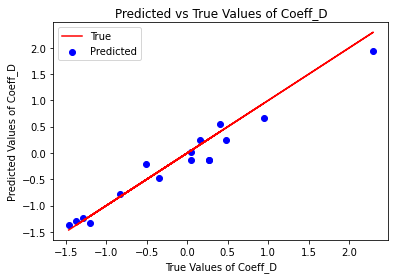

In [12]:
import matplotlib.pyplot as plt

y_pred_test = random_forest_model.predict(X_test)
r2_test = r2_score(Y_test, y_pred_test)
print("R2 Score Test:", r2_test)

mse_test = mean_squared_error(Y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Square Error (RMSE) Test:", rmse_test)

# Plotting predicted vs true values
plt.scatter(Y_test, y_pred_test, color="blue", label="Predicted")
plt.plot(Y_test, Y_test, color="red", label="True")
plt.xlabel("True Values of Coeff_D")
plt.ylabel("Predicted Values of Coeff_D")
plt.title("Predicted vs True Values of Coeff_D")
plt.legend()
plt.show()


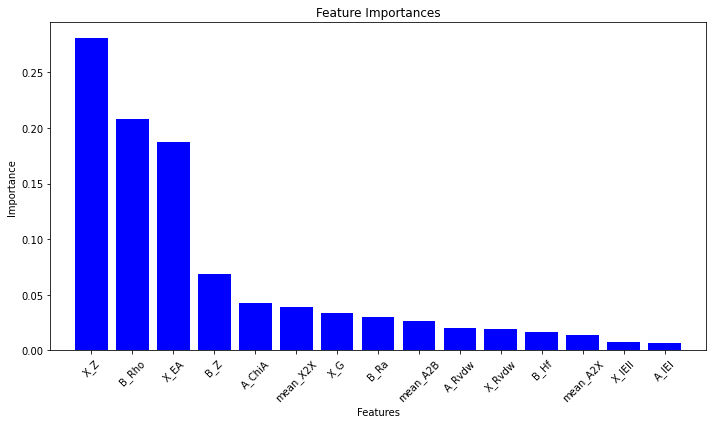

In [126]:
# Train RandomForestRegressor on selected features

# Get feature importances
importances = model.feature_importances_

# Get indices of features sorted by importance
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train_selected.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_train_selected.shape[1]), selected_feature_names[indices], rotation=45)
plt.xlim([-1, X_train_selected.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


# XGBoost Regressor

In [16]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Convert data into DMatrix format
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

# Set parameters for XGBoost Regressor
params = {
    'objective': 'reg:squarederror',  # Use squared error for regression task
    'eval_metric': 'rmse'  # Root Mean Squared Error (RMSE) used for evaluation
}

# Train the model
num_boost_round = 100  # You can adjust the number of boosting rounds
xgb_model = xgb.train(params, dtrain, num_boost_round=num_boost_round)

# Predict on the test set
y_pred_train = xgb_model.predict(dtrain)



# Calculate R2 score
r2 = r2_score(Y_train, y_pred_train)
print("R2 Score Train:", r2)

# Calculate root mean square error (RMSE)
mse = mean_squared_error(Y_train, y_pred_train)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE) Train:", rmse)



R2 Score Train: 0.9999995506665718
Root Mean Square Error (RMSE) Train: 0.0006753710026059731


R2 Score Test: 0.9220760327662743
Root Mean Square Error (RMSE) Test: 0.2673874535628133


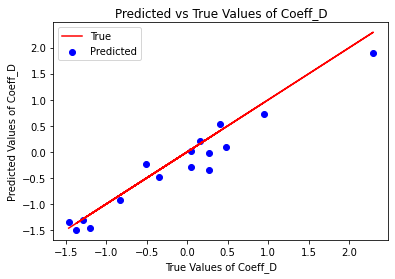

In [17]:
import matplotlib.pyplot as plt

y_pred_test = xgb_model.predict(dtest)
r2_test = r2_score(Y_test, y_pred_test)
print("R2 Score Test:", r2_test)

mse_test = mean_squared_error(Y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Square Error (RMSE) Test:", rmse_test)

# Plotting predicted vs true values
plt.scatter(Y_test, y_pred_test, color="blue", label="Predicted")
plt.plot(Y_test, Y_test, color="red", label="True")
plt.xlabel("True Values of Coeff_D")
plt.ylabel("Predicted Values of Coeff_D")
plt.title("Predicted vs True Values of Coeff_D")
plt.legend()
plt.show()


# Neural Network

In [75]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras import regularizers
from sklearn.metrics import mean_squared_error


# Define the neural network architecture
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Dropout layer for regularization
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.05)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.05)),
    Dense(1)  # Output layer with one neuron for regression
])

# Compile the model
nn_model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
history = nn_model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2)


# Make predictions on the training data
y_pred_train = nn_model.predict(X_train)

# Calculate R2 score
r2 = r2_score(Y_train, y_pred_train)
print("R2 Score Train:", r2)

# Calculate root mean square error (RMSE)
mse = mean_squared_error(Y_train, y_pred_train)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE) Train:", rmse)




Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/2 [==============>...............] - ETA: 0s - loss: 7.5715WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000028D38D65438> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full o

1/1 [==============================] - 0s 61ms/step
R2 Score Test: 0.9333477411753375
Root Mean Square Error (RMSE) Test: 0.24729363241924993


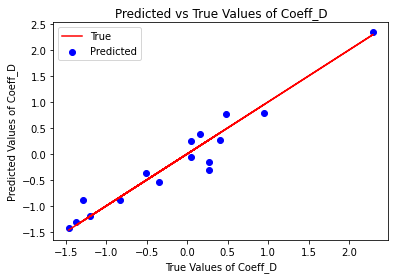

In [76]:
import matplotlib.pyplot as plt

y_pred_test = nn_model.predict(X_test)
r2_test = r2_score(Y_test, y_pred_test)
print("R2 Score Test:", r2_test)

mse_test = mean_squared_error(Y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Square Error (RMSE) Test:", rmse_test)

# Plotting predicted vs true values
plt.scatter(Y_test, y_pred_test, color="blue", label="Predicted")
plt.plot(Y_test, Y_test, color="red", label="True")
plt.xlabel("True Values of Coeff_D")
plt.ylabel("Predicted Values of Coeff_D")
plt.title("Predicted vs True Values of Coeff_D")
plt.legend()
plt.show()


# DIMENSIONALITY REDUCTION

In [108]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Apply PCA to reduce dimensionality
pca = PCA(n_components= 20)  # Reduce to 2 components for example
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train Random Forest regressor on reduced dimensionality data
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_pca, Y_train)


# Make predictions on the training data
y_pred_train = model.predict(X_train_pca)

# Calculate R2 score
r2 = r2_score(Y_train, y_pred_train)
print("R2 Score Train:", r2)

# Calculate root mean square error (RMSE)
mse = mean_squared_error(Y_train, y_pred_train)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE) Train:", rmse)




R2 Score Train: 0.9973938656081218
Root Mean Square Error (RMSE) Train: 0.051434728193747004


R2 Score Test: 0.9228071645678859
Root Mean Square Error (RMSE) Test: 0.2661300984317178


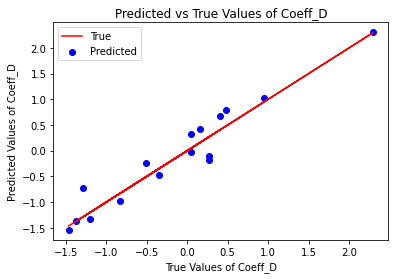

In [109]:


import matplotlib.pyplot as plt

y_pred_test = model.predict(X_test_pca)
r2_test = r2_score(Y_test, y_pred_test)
print("R2 Score Test:", r2_test)

mse_test = mean_squared_error(Y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Square Error (RMSE) Test:", rmse_test)

# Plotting predicted vs true values
plt.scatter(Y_test, y_pred_test, color="blue", label="Predicted")
plt.plot(Y_test, Y_test, color="red", label="True")
plt.xlabel("True Values of Coeff_D")
plt.ylabel("Predicted Values of Coeff_D")
plt.title("Predicted vs True Values of Coeff_D")
plt.legend()
plt.show()




# FEATURE ANALYSIS

Selected Features: Index(['X_EA', 'X_Rvdw', 'X_Z', 'mean_A2B', 'X_G', 'X_IEII', 'mean_X2X',
       'A_Rvdw', 'A_ChiA', 'A_IEI', 'B_Z', 'B_Hf', 'B_Ra', 'mean_A2X',
       'B_Rho'],
      dtype='object')
R2 Score Test: 0.9255845494776394
Root Mean Square Error (RMSE) Test: 0.26129858352583507


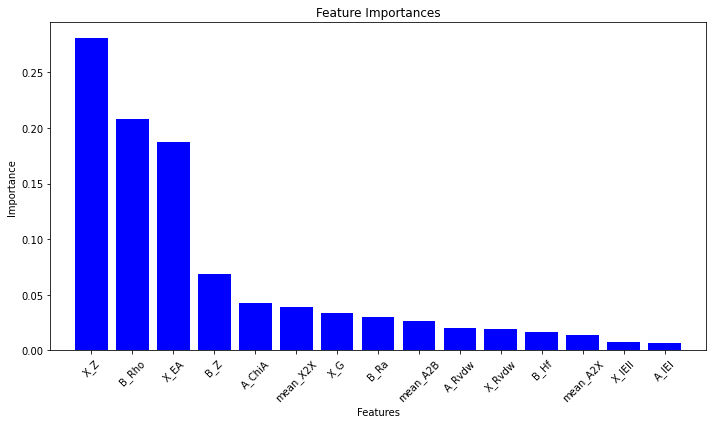

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



# Initialize SelectKBest with f_regression as the scoring function
selector = SelectKBest(score_func=f_regression, k=15)  # Adjust k as needed

# Fit selector to training data
selector.fit(X_train, Y_train)

# Get indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get names of the selected features from the original dataset
selected_feature_names = X_train.columns[selected_feature_indices]

# Print names of the k best features
print("Selected Features:", selected_feature_names)

# Transform training and test sets to selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Train RandomForestRegressor on selected features
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_selected, Y_train)

y_pred_test = model.predict(X_test_selected)
r2_test = r2_score(Y_test, y_pred_test)
print("R2 Score Test:", r2_test)

mse_test = mean_squared_error(Y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Square Error (RMSE) Test:", rmse_test)



# Plot feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train_selected.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_train_selected.shape[1]), selected_feature_names[indices], rotation=45)
plt.xlim([-1, X_train_selected.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()
